**任务描述**
> 本关任务：掌握线性回归的算法原理，用线性回归算法对测试集进行预测。


**相关知识**

# 1.线性回归原理
## 简单线性回归

> + 在生活中，我们常常能碰到这么一种情况，一个变量会跟着另一个变量的变化而变化，如圆的周长与半径的关系，当圆的半径确定了，那么周长也就确定了。还有一种情况就是，两个变量之间看似存在某种关系，但又没那么确定，如青少年的身高与体重，他们存在一种近似的**线性**关系：
>> + *身高/cm = 体重/kg +105*
> + 但是，并不是每个青少年都符合这个公式，只能说每个青少年的身高体重都存在这么一种近似的线性关系。那么，到底什么是线性回归呢？
> + 假如我们将青少年的身高和体重值作为坐标，不同人的身高体重就会在平面上构成不同的坐标点，然后用一条直线，尽可能的去拟合这些点，这就是简单的**线性回归**。
> <img src="./imgs/chap01/linearRegression1.png"  width=50%>

> + 简单的线性回归模型如下：
>>  $$y=wx+b$$
> 其中 $x$ 表示特征值(如：体重值)，$w$ 表示权重，$b$ 表示偏置，$y$ 表示标签(如：身高值)。

## 多元线性回归

> + 在简单线性回归中，一个变量会随另一个变量的变化而变化。但是生活中，还有很多变量，可能会随多个变量的变化而变化，比如房价，影响它的因素可能有：房屋面积、地理位置等等。
> + 如果我们要给它们建立出近似的线性关系，就需要使用**多元线性回归**，多元线性回归模型如下：
>> + $$y=b+w_1x_1+w_2x_2+...+w_nx_n$$
> + 其中 $x_i$ 表示第 $i$ 个特征值，$w_i$ 表示第 $i$ 个特征对应的权重，$b$ 表示偏置，$y$ 表示标签。

> + 多元线性回归模型还有另一种等价的表达形式：
>> + $$y=\theta_0x_0+\theta_1x_1+\theta_2x_2+...+\theta_nx_n$$
> + 即令 $x_0=1$，则 $\theta_0$ 相当于偏执 $b$。

> + 对线性回归模型，假设训练集中 有`m` 个样本，每个样本有 `n` 个特征，可以采用矩阵的表示方法，则多元线性回归模型还可以表示为：
>> + $$Y=\theta X$$
> + 其中$\theta=(\theta_0,\theta_1,\theta_2,...,\theta_n)^T$。

> + 其损失函数可以表示为：
>> + $$J(\theta)=(Y-\hat{Y})^2=(Y-\theta X)^2=(Y-\theta X)^T(Y-\theta X)$$
> + 其中，标签 $Y$ 为 `(m,1)` 的矩阵，训练特征 $X$ 为 `(m,n+1)` 的矩阵(**列数为n+1，是因为需要添加一列 $x_0$， 并且这一列的值都为 1**)，回归系数 $\theta$ 为 `(n+1,1)` 的矩阵。
> + 对于多元线性回归模型中矩阵的计算，可利用下图辅助理解：
>> + <img src="./imgs/chap01/Fig01_01_回归矩阵.png"  width=50%>

> + 我们的目的是求使得$min(J(\theta))$的$\theta$,所以需要对 $\theta$ 求导，并令其导数等于 0 ，可以得到 $X^T(Y-\theta X)=0$。所以，最优解为：
>> + $$\theta = (X^TX)^{-1}X^TY$$
> + 这个就是正规方程解，我们可以通过最优方程解，直接求得我们所需要的参数 $\theta$。


在算法中，经常会用到矩阵知识，为了让大家回顾矩阵相乘的知识，对矩阵有更好的了解，下面是一个矩阵应用的案例。

# 2.矩阵应用举例
> + 某公司有四个工厂，分布在不同地区，同时生产三种产品，如下表所示：

|工厂\产品|P1|P2|P3|
|:---:|:---:|:---:|:---:|
|甲| 5 | 2 | 4 |
|乙|3|8|2|
|丙|6|0|4|
|丁|0|1|6|


> 其中，四行分别表示甲乙丙丁四个工厂的生产情况，三列分别表示三种产品 P1、P2、P3 的产量。<br>
> 可以用矩阵表示为 A=$\begin{pmatrix}5 & 2 &4\\ 3 & 8&2\\6&0&4\\0&1&6 \end{pmatrix}$。<br>
> + 再设矩阵 B=$\begin{pmatrix}2 & 4\\ 1 & 3\\3&2 \end{pmatrix}$，其中第一列表示三种产品的单件利润，第二列表示三种产品的单件体积。<br>
> C = AB = $\begin{pmatrix}5 & 2 &4\\ 3 & 8&2\\6&0&4\\0&1&6 \end{pmatrix}$$\begin{pmatrix}2 & 4\\ 1 & 3\\3&2 \end{pmatrix}$ = $\begin{pmatrix}24 & 44 \\ 20 & 40\\24&32\\19&15 \end{pmatrix}$
> 矩阵 C，是由矩阵 A 与矩阵 B 相乘得到的。矩阵 C 的第一列数据分别表示四个工厂的利润，第二列分别表示四个工厂需要的存储空间。

> 以上是简单的矩阵乘法，手算比较麻烦，可以通过 numpy 直接实现矩阵的乘法。<br>
在算法的实现代码里，会用到了很多 numpy 的知识，下面介绍一些在算法代码中将要用到的 numpy 基础知识。

# 3.numpy基础知识

**(1) 生成矩阵(matrix)** 

In [2]:
# np.mat用于生成矩阵
# 生成两个矩阵
import numpy as np
A= np.mat([[5,2,4],
           [3,8,2],
           [6,0,4],
           [0,1,6]]) # 创建矩阵A
B=np.mat([[2,4],
           [1,3],
           [3,2]]) # 创建矩阵B
print(A)
print('--------')
print(B)

[[5 2 4]
 [3 8 2]
 [6 0 4]
 [0 1 6]]
--------
[[2 4]
 [1 3]
 [3 2]]


**(2) 求转置** 

In [3]:
# .T可以得到矩阵A的转置
A.T

matrix([[5, 3, 6, 0],
        [2, 8, 0, 1],
        [4, 2, 4, 6]])

可以看出行和列进行了转换。

**(3) 矩阵乘** 

In [4]:
# *可以实现矩阵A与B的乘法
A*B

matrix([[24, 34],
        [20, 40],
        [24, 32],
        [19, 15]])

In [5]:
**(4) 求逆矩阵** 

SyntaxError: invalid syntax (<ipython-input-5-19fca16381f9>, line 1)

In [6]:
 #定义一个方阵
m = np.mat([[1,2,3], [2,2,3], [2,3,4]])  
print(m)
print('--------')
# .I用于求矩阵的逆矩阵
m.I


[[1 2 3]
 [2 2 3]
 [2 3 4]]
--------


matrix([[-1.,  1.,  0.],
        [-2., -2.,  3.],
        [ 2.,  1., -2.]])

In [7]:
#由矩阵知识，可知一个矩阵和它的逆矩阵相乘，会得到一个单位矩阵
m*m.I

matrix([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

↑`m*m.I`得到的是单位矩阵，说明`m.I`确实是`m`的逆矩阵

**(5) 计算行列式** 

> + <img src="./imgs/chap01/Fig01_02_矩阵行列式.png"  width=50%>

In [8]:
#把0-20（左闭右开）形成一个一维数组
np.arange(20)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [9]:
#np.reshape(np.arange(20),(5,2,2))把np.arange(20)变成（5（个），2（行），2（列））5个二位数组（2*2矩阵）
a = np.reshape(np.arange(20),(5,2,2))
a

array([[[ 0,  1],
        [ 2,  3]],

       [[ 4,  5],
        [ 6,  7]],

       [[ 8,  9],
        [10, 11]],

       [[12, 13],
        [14, 15]],

       [[16, 17],
        [18, 19]]])

In [10]:
#numpy.linalg.det() 可以计算数组的行列式/linalag（线性代数）det（行列式）
a = np.reshape(np.arange(20),(5,2,2))
b = np.linalg.det(a)
print(a)
print('--------')
print(b)

[[[ 0  1]
  [ 2  3]]

 [[ 4  5]
  [ 6  7]]

 [[ 8  9]
  [10 11]]

 [[12 13]
  [14 15]]

 [[16 17]
  [18 19]]]
--------
[-2. -2. -2. -2. -2.]


# 4.线性回归的实现代码

>  + 正规方程解： $$\theta = (X^TX)^{-1}X^TY$$
>  + 预测值求解：$$Y=\theta X$$


In [11]:
# 定义类LinearRegression
class LinearRegression :
    # 初始化线性回归模型
    def __init__(self):
        self.theta = None
        
    # 通过代码实现theta的求解    
    def fit(self,xArr,yArr):
        '''
        input:xArr(ndarray): 特征向量，m行n列，即m个样本，n个特征
              yArr(ndarray): 标签值，1行m列，及m个标签，注意：做矩阵乘时需转成m行1列
        output:无
        '''
        #s1：将xArr数据转化为矩阵xMat
        xMat=np.mat(xArr)
        
        #s2：将yArr数据转化为矩阵并进行转置成矩阵yMat
        yMat=np.mat(yArr).T   
        #s3： 矩阵xMat.T与xMat做矩阵乘得到xTx
        xTx=xMat.T*xMat
              
        #s4：判断矩阵xTx是否是奇异矩阵
        if np.linalg.det(xTx) == 0.0:
            print("这个矩阵是奇异的，不可求逆")
            return
        #s5：根据最优解的求解公式，求theta值，应该为n行1列
        self.theta =(xTx.I)*(xMat.T*yMat)
    
    # 对测试数据进行预测
    def predict(self,test_data):
        '''
        input:test_data(ndarray):测试样本，m行n列，即m个样本，n个特征
        output:predict(matrix):预测结果，应该为m行1列的矩阵
        '''        
        #s1：将test_data数据转化为矩阵
        test_data=np.mat(test_data)
        #s2：通过得到的theta值，对数据进行预测，结果为m行1列的矩阵
        y_predict =test_data*self.theta  
        return y_predict

# 5.案例应用

## 读取数据
> `file_path = "./dataSets/dataTest1.csv"`

In [22]:
# 读取数据
import pandas as pd
file_path = "./dataSets/dataTest1.csv"
#filepath：文件地址，相对地址或者绝对地址
#header：默认为None，即认为文件不包含列名，并以数字开始设置列名
data1 = pd.read_csv(file_path,header=None)

# 查看数据前5行
data1.head()



,0,1,2
0,1,0.067732,3.176513
1,1,0.427810,3.816464
2,1,0.995731,4.550095
3,1,0.738336,4.256571
4,1,0.981083,4.560815


↑从数据可以看出，第一列的值总是等于1，对应的就是线性回归里的$x_0$；第二列的值相当于线性回归里的$x_1$；第三列的值相当于线性回归里的$y4。

## 查看数据大小

In [23]:
data1.iloc[:,1].head()

0    0.067732
1    0.427810
2    0.995731
3    0.738336
4    0.981083
Name: 1, dtype: float64

In [24]:
# 查看数据大小
data1.shape

(200, 3)

## 通过图形查看数据

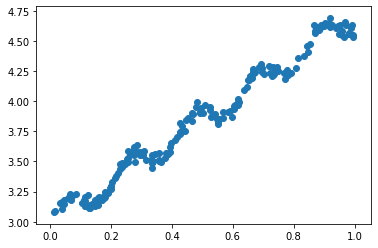

In [25]:
#导入画图模块
import matplotlib.pyplot as plt
#在线显示
%matplotlib inline
#展示数据
x_data1 = data1.iloc[:,1]
y_data1 = data1.iloc[:,2]
# 制作散点图
plt.scatter(x_data1,y_data1)

↑ 通过图形可以看出，$y$值大致随着$x$的增长呈现线性增长的趋势。

## 提取特征值和真实值

In [33]:
X = data1.iloc[:,:-1].values
X

array([[1.      , 0.067732],
       [1.      , 0.42781 ],
       [1.      , 0.995731],
       [1.      , 0.738336],
       [1.      , 0.981083],
       [1.      , 0.526171],
       [1.      , 0.378887],
       [1.      , 0.033859],
       [1.      , 0.132791],
       [1.      , 0.138306],
       [1.      , 0.247809],
       [1.      , 0.64827 ],
       [1.      , 0.731209],
       [1.      , 0.236833],
       [1.      , 0.969788],
       [1.      , 0.607492],
       [1.      , 0.358622],
       [1.      , 0.147846],
       [1.      , 0.63782 ],
       [1.      , 0.230372],
       [1.      , 0.070237],
       [1.      , 0.067154],
       [1.      , 0.925577],
       [1.      , 0.717733],
       [1.      , 0.015371],
       [1.      , 0.33507 ],
       [1.      , 0.040486],
       [1.      , 0.212575],
       [1.      , 0.617218],
       [1.      , 0.541196],
       [1.      , 0.045353],
       [1.      , 0.126762],
       [1.      , 0.556486],
       [1.      , 0.901144],
       [1.    

In [34]:
#提取特征值
#所有行的，所有列除去最后一列（-1）
X = data1.iloc[:,:-1].values
#提取标签值
y = data1.iloc[:,-1].values

## 建立模型，并训练模型

In [49]:
# 建立模型
lr = LinearRegression()
# 训练模型
lr.fit(X,y)


## 对数据进行预测

In [40]:
#为了求拟合曲线，因此使用原始数据进行预测
y_predict =lr.predict(X)

#查看预测的前10条数据
print(y_predict[:10])

[[3.12257084]
 [3.73301922]
 [4.69582855]
 [4.25946098]
 [4.67099547]
 [3.89977285]
 [3.65007895]
 [3.06514517]
 [3.23286683]
 [3.24221654]]


## 通过图形查看拟合效果

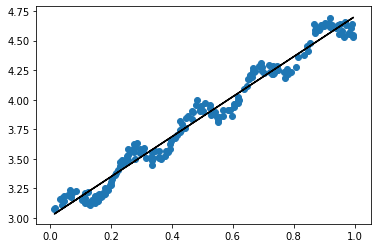

In [42]:
# 绘制原始数据的散点图
x_data1 = data1.iloc[:,1]
y_data1 = data1.iloc[:,2]
plt.scatter(x_data1,y_data1)

# 绘制预测数据y_predict的折线图，color='black'
plt.plot(x_data1,y_predict,color='black')

↑ 图中，蓝色的点为真实值，黑色的线为拟合直线。

# 作业
> 编程要求
>> 通过 `pd.read_csv` 读取右侧数据集 `dataTest2.csv (file_path2 = "./dataSets/dataTest2.csv")`， <br> 根据每一步的提示，完成相应代码，依次完成读取数据，提取特征值和标签值，建立模型，并训练模型，对数据进行预测，通过图形查看拟合效果。

> 说明：数据集由 3 列构成，第一列相当于 x0，第二列相当于 x1，第三列相当于 y。

In [4]:
# 补充下面Begin-End区间的代码，实现对数据进行预测
########## Begin ##########
import numpy as np
import pandas as pd
file_path2 ="./dataSets/dataTest2.csv"
# 读取数据
data2 = pd.read_csv(file_path2,header=None)
# 查看数据前5行
data2.head()


,0,1,2
0,1,0,2.339079
1,1,1,-1.169310
2,1,2,1.553359
3,1,3,7.005153
4,1,4,8.902781


In [5]:
# 数据大小
data2.shape

(50, 3)

In [6]:
# 提取特征值X和真实值y
X = data2.iloc[:,:-1].values
y = data2.iloc[:,-1].values

In [8]:
# 建立模型lr
lr=LinearRegression()
# 训练模型
lr.fit(X,y)


In [9]:
# 对数据进行预测，为了求拟合曲线，因此使用原始数据进行预测
y_pred =lr.predict(X)

#查看预测的前10条数据
print(y_pred[:10])
########## End ##########

[[ 0.96940206]
 [ 2.4720861 ]
 [ 3.97477014]
 [ 5.47745418]
 [ 6.98013822]
 [ 8.48282226]
 [ 9.9855063 ]
 [11.48819034]
 [12.99087438]
 [14.49355842]]


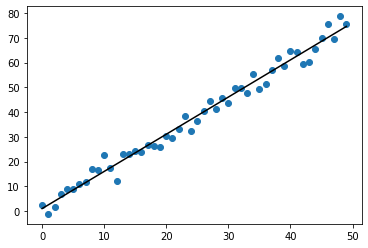

In [34]:
# 通过图形查看拟合效果
# 参考案例的画图代码，在下面补充画图代码
########## Begin ##########
import matplotlib.pyplot as plt
# 绘制原始数据的散点图
x_data2=data2.iloc[:,1].values
y_data2=data2.iloc[:,2].values
plt.scatter(x_data2,y_data2)
# 绘制预测数据y_pred的折线图，color='black'
plt.plot(x_data2,y_pred,color='black')
########## End ##########